# WestNileVirus

https://www.kaggle.com/c/predict-west-nile-virus

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
directory_path="/Users/eran/Galvanize_more_repositories/WestNileVirus/all/"
directory_path

'/Users/eran/Galvanize_more_repositories/WestNileVirus/all/'

## Train data

In [3]:
train_csv=os.path.join(directory_path, "train.csv")

In [4]:
# Reading in the train data
train=pd.read_csv(train_csv)

## EDA

### general info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [6]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


### Investigating specific columns: 'Species','Traps','AddressAccuracy' and Geo-location

In [7]:
train['Species'].unique() ## 6 different species

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [8]:
len(train['Trap'].unique()) ## 136 different traps

136

In [9]:
train['AddressAccuracy'].describe() ## this is (according to description) the accuracy as returned from geo-locator

count    10506.000000
mean         7.819532
std          1.452921
min          3.000000
25%          8.000000
50%          8.000000
75%          9.000000
max          9.000000
Name: AddressAccuracy, dtype: float64

In [10]:
train['AddressAccuracy'].hist() ## so most accuracy's are 8 and 9, some 5 and very little 3. 
# Later this could split into 3,4 categories and then into 3,4 dummie features 

#### ploting histogram (count) of count vs specie and whether there is WMV (color) 

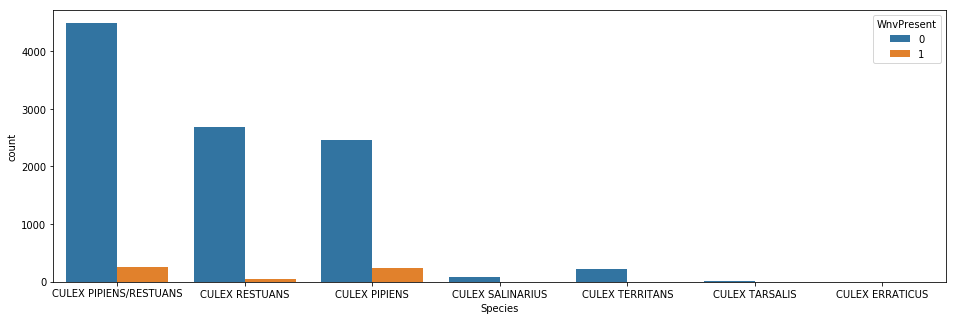

In [11]:
# looking at bars of every specie whether it has virus (orange) or not (blue)
# (to see if there is relationship between the species and the appearence of virus)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline
dim=(16,5)
plt.subplots(figsize=dim)
sns.countplot('Species',data=train,hue='WnvPresent',)
# seems that only 3 species are really prevalent.
# "Culex Pipiens" has the highest relative portion of WNtV ~10% 

#### doing dummies out of species

In [12]:
# make new train with dummies
trainWdum=pd.get_dummies(train,columns=['Species'],drop_first=True)

In [13]:
trainWdum.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446,0.256901,0.452313,0.260803,0.008186,0.000571,0.021131
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936,0.436945,0.497744,0.439094,0.090109,0.023892,0.143827
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### what about the geo-location feature?

In [14]:
# example of how many observation for 1 location:
df1location=trainWdum[(trainWdum['Latitude']==41.954690) & (trainWdum['Longitude']==-87.800991)]
len(df1location)

185

In [15]:
df1location.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,1,0,0,0,0


In [16]:
## two rows in the train data: same date place etc. just the species are differen 
train.iloc[1]==train.iloc[0]

Date                       True
Address                    True
Species                   False
Block                      True
Street                     True
Trap                       True
AddressNumberAndStreet     True
Latitude                   True
Longitude                  True
AddressAccuracy            True
NumMosquitos               True
WnvPresent                 True
dtype: bool

In [17]:
df1location.tail(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
10415,2013-09-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,8,0,1,0,0,0,0,0


In [18]:
# there are 185 records from the same location collected in 67 dates
len(df1location['Date'].unique())

67

### Getting baseline accuracy of predicting WNV 
let's understand the predictive capability of this data set without additional spreadsheets and without feature engineering:

In [19]:
trainBasic=trainWdum[['Latitude','Longitude','AddressAccuracy','NumMosquitos','Species_CULEX PIPIENS','Species_CULEX PIPIENS/RESTUANS','Species_CULEX RESTUANS','Species_CULEX SALINARIUS','Species_CULEX TARSALIS','Species_CULEX TERRITANS','WnvPresent']]

In [20]:
trainBasic.head(2)

,Latitude,Longitude,AddressAccuracy,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,WnvPresent
0,41.95469,-87.800991,9,1,0,1,0,0,0,0,0
1,41.95469,-87.800991,9,1,0,0,1,0,0,0,0


In [21]:
y=trainBasic['WnvPresent']
X=trainBasic.drop('WnvPresent',1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
## stratify makes sure that ratio

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
pred=log_reg.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
target_names=['No Virus','Virus']
print(classification_report(y_test, pred, target_names=target_names))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print("_____________________")
print("accuracy = ",round(accuracy_score(y_test,pred),3))

             precision    recall  f1-score   support

   No Virus       0.95      1.00      0.97      1992
      Virus       0.00      0.00      0.00       110

avg / total       0.90      0.95      0.92      2102

[[1992    0]
 [ 110    0]]
_____________________
accuracy =  0.948


/Users/eran/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
#               predicted.NO (-) predicted.Yes (+)
# actual NO (F)          1992            0
# actual Yes (T)          110            0

# accuracy = 1992/2102= 94.7% # (looking at all the predicted correctly - (TP+TN)/all )
# precision=0/0= 0  #(looking at predicted.yes column only)
# recall=0/110 = 0  #(looking at actual.yes column only)
# F1_score= 2/(1/0+1/0)=0  #2/(1/precision+ 1/recall) (weighted average between precision and recall) 

Accuracy is very high ~95% but this is because it's easy to predict that there is no virus because it's rare. but in cases where there is a virus, none were detected as we can see looking at the precision and recall equal to 0.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
yknn_pred=knn.predict(X_test)

In [28]:
print(classification_report(y_test, yknn_pred, target_names=target_names))
print(confusion_matrix(y_test,yknn_pred))
print("______________")
print("accuracy = ",round(accuracy_score(y_test,yknn_pred),3))

             precision    recall  f1-score   support

   No Virus       0.95      0.99      0.97      1992
      Virus       0.33      0.07      0.12       110

avg / total       0.92      0.94      0.93      2102

[[1976   16]
 [ 102    8]]
______________
accuracy =  0.944


In [29]:
from sklearn.metrics import f1_score
k_range=range(1,15)
accur=[]
f1list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acck=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    accur.append(acck)
    f1list.append(f1)

/Users/eran/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'f1_score')

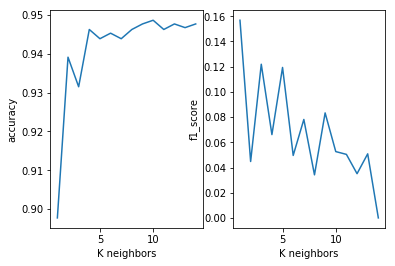

In [30]:
plt.subplot(1,2,1)
plt.plot(k_range,accur)
plt.xlabel('K neighbors')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(k_range,f1list)
plt.xlabel('K neighbors')
plt.ylabel('f1_score')

because of the scarcity of incidence of WMV, the model is not better than a "dumb" model of predicting "No 
VIrus" every time 

We can see that after a certain point, increasing the bias (i.e."dumbing" the model, by using even higher kNeighbors) we don't see decrease in accuracy as we'd expect

f1_score (weighted average of precision and recall) is only dimished when the k are larger (meanning generalizing using higher K's) only decreases performance')  

#### we need to enrich the data, using aditional data sets..
later we will also have to deal with the imbalanced data set (scarce WMV=1 response rate)

## Spray data

### EDA

In [31]:
spray_csv=os.path.join(directory_path,"spray.csv")

In [32]:
spray=pd.read_csv(spray_csv)

In [33]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [34]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


It seems that there are nulls in the df in the Time column. We will see if will need to attend to that later.

how many days did they spray around?

In [337]:
spray['Date'].unique()

array(['2011-08-29T00:00:00.000000000', '2011-09-07T00:00:00.000000000',
       '2013-07-17T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-16T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

Sprayed in ten different days.

### Using the Spray dataset 

#### Rational: 
#### assumption - recently sprayed areas would most likely reduce frequency in WNV for the same season. 
If Chicago Municipality, would like to know how to allocate sparying efforts (or any other eradication efforts for that matter), we should filter out the effect of spraying from our predictive model, as it is target-linked.
#### Method: find obsevations (collections on Train data) with locations that have been sprayed in the past 150 days ( length of a season of collection from May to Oct), and exclude them from the data sets used for modelling 

_________________________________________________________

#### Merging the spray and train data

because geo-location has such high resolution, we can't find matches between the data sets (which doesn't allow us to merge the tables accordingly). so 3 digits after the point seems reasonable - equates to 100 meters in resolution ( according to quick exploration on google maps: .001 ~=100 Meters)

In [39]:
# SPRAY DATA round longitude /latitude to 3 digits after the point
sprayR3=spray
sprayR3['Longitude']=sprayR3['Longitude'].round(3)
sprayR3['Latitude']=sprayR3['Latitude'].round(3)

In [51]:
# similarly, round the geo-location in the train data
# TRAIN with Dummies Data - round geo-location to 3 after the point. 
trainWdumR3=trainWdum
trainWdumR3['Longitude']=trainWdumR3['Longitude'].round(3)
trainWdumR3['Latitude']=trainWdumR3['Latitude'].round(3)

every location has different NUMBER of collection dates (train data) and spray dates (spray data) so when merging, we would like to see collection dates that are recent to spray dates because they should have a strong effect on the response and we might want to eliminate this effect because of target link. 
How shall we locate them?

In [40]:
# first, how many entries per geo-location in spray data? 
sprayR3['longlat']=list(zip(sprayR3['Latitude'],sprayR3['Longitude'])) # zip log and lat into one column
grp=sprayR3.groupby(['longlat'])['Date'].count() # count for every location the different number of dates
print(grp.describe()) # for each location, how many different dates it got sprayed?

count    6517.000000
mean        2.276354
std         6.797308
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       542.000000
Name: Date, dtype: float64


So, 75% of locations where sprayed at most 3 times. 
Let's get more specific, what is the gap between 1st and last spray dates for a specific location?

In [151]:
sprayR3['Date']=pd.to_datetime(sprayR3['Date']) ## change to datetime object so operations could be done
type(sprayR3['Date'][0])

pandas._libs.tslib.Timestamp

In [42]:
aggd=sprayR3.groupby(['longlat'])['Date'].agg([np.ptp]) ## group by longlat and on the dates, get the range (max-min)
aggd=aggd.sort_values('ptp',ascending=False) 
print(aggd.head(3))

                       ptp
longlat                   
(41.997, -87.811) 729 days
(41.954, -87.784)   1 days
(41.911, -87.75)    1 days


In [43]:
oldaggd=aggd[aggd['ptp'].dt.days>150]
oldaggd.head()

,ptp
longlat,
"(41.997, -87.811)",729 days


so only one place was sprayed more than 150 days appart (and actually this place was the only one with more than 1 day appart..), so effectively only one place was sprayed more than once.
how many times it was sprayed?

In [44]:
sprayR3[sprayR3['longlat']==(41.997, -87.811)]

,Date,Time,Latitude,Longitude,longlat
1454,2011-09-07,NaN,41.997,-87.811,"(41.997, -87.811)"
1455,2011-09-07,NaN,41.997,-87.811,"(41.997, -87.811)"
14664,2013-09-05,7:51:11 PM,41.997,-87.811,"(41.997, -87.811)"


Twice, 2 years appart.  

what about all the other sites how many days appart where they sprayed?

In [45]:
recaggd=aggd[aggd['ptp'].dt.days!=729] ## excluding that one outlier
recaggd['ptp'].value_counts()

0 days    6511
1 days       5
Name: ptp, dtype: int64

sites were sprayed 1 day apart at most, only 5 sites where sprayed throughout 2 days.
This is an insignificant ammount, so essentially if we aggregate the spray by geo-location we can merge it with train, and not worry about duplicates.

(we can do it because we assume that the time stamp of spraying is not informative and produces redundant data. e.g. spraying at 11:58 PM, then at 12:04 AM (the next day) a few meters away with changes in geo-location (before rounding it when the Longitude and Latitude where 10^-6 resolution)

####  Grouping Data from spray 
instead of merging spray data directly

Let's create a new df from spray, to merge later with train data.
the new df will be grouped by geo-location, and the dates of collection would be aggregated and investigated (e.g. to see how many sprayed occured in every location (count), what's the gap between 1st and last spray (ptp)..)

In [138]:
print(sprayR3.head(2))
sprayR3
ff=sprayR3.groupby(['Longitude','Latitude']).Date.agg(['count','min','max',np.ptp]).reset_index()
ff=ff.sort_values('ptp',ascending=False)
ff.head()

        Date        Time  Latitude  Longitude            longlat
0 2011-08-29  6:56:58 PM    42.392    -88.089  (42.392, -88.089)
1 2011-08-29  6:57:08 PM    42.391    -88.089  (42.391, -88.089)


,Longitude,Latitude,count,min,max,ptp
696,-87.811,41.997,3,2011-09-07,2013-09-05,729 days
1804,-87.784,41.957,3,2013-08-15,2013-08-16,1 days
1858,-87.783,41.965,3,2013-08-15,2013-08-16,1 days
2789,-87.750,41.911,2,2013-08-15,2013-08-16,1 days
1801,-87.784,41.954,4,2013-08-15,2013-08-16,1 days


In [136]:
print('len spray data',len(sprayR3))
print('unique spray data',sprayR3['longlat'].nunique())
print('len grouped long/lat spray data',len(ff))
ff['longlat']=list(zip(ff['Longitude'],ff['Latitude']))
print('unique grouped long/lat spray data',ff['longlat'].nunique())

len spray data 14835
unique spray data 6517
len grouped long/lat spray data 6517
unique grouped long/lat spray data 6517


In [244]:
res4=pd.merge(ff,trainWdumR3,on=['Longitude','Latitude'],how='right',indicator=True)
print(len(res4))
print(len(trainWdumR3))
res4.head(1)

10506
10506


,Longitude,Latitude,count,min,max,ptp,Date,Address,Block,Street,...,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,_merge
0,-87.705,41.883,3.0,2013-08-22,2013-08-22,0 days,2007-07-02,"3300 West Randolph Street, Chicago, IL 60612, USA",33,E RANDOLPH ST,...,8,2,0,0,1,0,0,0,0,both


Let's create a function that finds the days since the most recent spray, given a date of collection minus dates of spraying: 

In [224]:
def recent(delMin,delMax):
    if (delMin>=0) & (delMax<0):
        dell=delMin
    elif (delMax>=0) & (delMin<0):
        dell=delMax
    elif (delMax<0) & (delMin<0):
        dell=3650
    elif (delMax>=0) & (delMin>=0):
        if delMax<delMin:
            dell=delMax
        elif delMax>delMin:
            dell=delMin
        else:
            dell=delMin
    elif delMin.isnull() or delMax.isnull():
        dell=3650
    return(dell)

In [252]:
res4['Date']=pd.to_datetime(res4['Date'])

In [253]:
res4['delmin']=res4['Date']-res4['min']
res4['delmin']=res4['delmin'].dt.days
res4['delmax']=res4['Date']-res4['max']
res4['delmax']=res4['delmax'].dt.days

In [290]:
res4['most_recent_spray (days)']=res4.apply(lambda x: recent(x['delmin'],x['delmax']),axis=1)

Let's look at res4. after 962 obdservations with spray, the rest is without data on spray:

In [287]:
print(res4.shape)
res4.loc[962:963,:]

(10506, 24)


,Longitude,Latitude,count,min,max,ptp,Date,Address,Block,Street,...,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,_merge,delmin,delmax
962,-87.788,41.970,2.0,2011-09-07,2011-09-07,0 days,2007-10-04,"6400 West Strong Street, Chicago, IL, USA",64,W STRONG ST,...,0,1,0,0,0,0,0,both,-1434.0,-1434.0
963,-87.801,41.955,NaN,NaT,NaT,NaT,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,...,0,0,1,0,0,0,0,right_only,NaN,NaN


Make an inner merge to concentrate on the spray&train intersection (and avoid dealing with NaT and NaN for now)

In [271]:
resIN=pd.merge(ff,trainWdumR3,on=['Longitude','Latitude'],how='inner',indicator=True)

In [272]:
resIN['Date']=pd.to_datetime(resIN['Date'])

In [274]:
resIN['delmin']=resIN['Date']-resIN['min']
resIN['delmin']=resIN['delmin'].dt.days
resIN['delmax']=resIN['Date']-resIN['max']
resIN['delmax']=resIN['delmax'].dt.days

use "recent" function (look previously) to be used again with apply and lambda to create a column of days since the most recent spray  

In [290]:
resIN['most_recent_spray (days)']=resIN.apply(lambda x: recent(x['delmin'],x['delmax']),axis=1)

#### Let's join the inner df (the merged grouped-spray data with train) and the rest of the train (without spray data), to make a new enriched df for modelling.

In [288]:
print(resIN.shape)
print(res4.shape)

(963, 25)
(10506, 24)


let's add a column to res4. 
Let's set a value for most recent spray at 3650 (10 yrs) to areas with no spray data, this is to avoid NaN and still put a big number to differntiate these cases from recently sprayed and up to several years sprayed before collection. 

In [292]:
res4['most_recent_spray (days)']=3650
res4['most_recent_spray (days)'].value_counts().head(3)

3650    10506
Name: most_recent_spray (days), dtype: int64

In [ ]:
Now conocat the dfs

In [339]:
res5=pd.concat([resIN,res4.loc[963:,:]])
res5.shape

(10506, 25)

now let's arrange the columns (delete and order)

In [340]:
colls=res5.columns
colls

Index(['Longitude', 'Latitude', 'count', 'min', 'max', 'ptp', 'Date',
       'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet',
       'AddressAccuracy', 'NumMosquitos', 'WnvPresent',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', '_merge', 'delmin',
       'delmax', 'most_recent_spray (days)'],
      dtype='object')

In [341]:
colis=list(colls)
print(colis)
colsnew=colis[:2]+colis[3:5]+[colis[-1]]+colis[6:14]+colis[15:21]+colis[14:15] 
print(colsnew)
res5=res5[colsnew]
res5.rename(columns={'Date':'Date_of_collection'},inplace=True)
res5.head(1)

['Longitude', 'Latitude', 'count', 'min', 'max', 'ptp', 'Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', '_merge', 'delmin', 'delmax', 'most_recent_spray (days)']
['Longitude', 'Latitude', 'min', 'max', 'most_recent_spray (days)', 'Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'AddressAccuracy', 'NumMosquitos', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'WnvPresent']


,Longitude,Latitude,min,max,most_recent_spray (days),Date_of_collection,Address,Block,Street,Trap,AddressNumberAndStreet,AddressAccuracy,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,WnvPresent
0,-87.705,41.883,2013-08-22,2013-08-22,3650,2007-07-02,"3300 West Randolph Street, Chicago, IL 60612, USA",33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",8,2,0,1,0,0,0,0,0


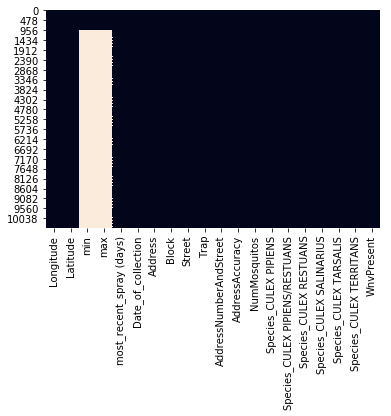

In [343]:
sns.heatmap(res5.isnull(),cbar=False) 
# the heatmap shows the 1st 962 of entries being sprayed data (rows in uniform black)
# the rest of the observations were not sprayed

####  finally let's see about our assumption (do areas that were recently sprayed have lower WNV frequency?

first let's isolate cases of recent spraying

In [298]:
res5['most_recent_spray (days)'].value_counts().head(3)

3650    10400
7           8
28          6
Name: most_recent_spray (days), dtype: int64

for places that where sprayed, what was the most recent spray? ( I have eliminated the 3650 (10yrs) for visualization purposes) 

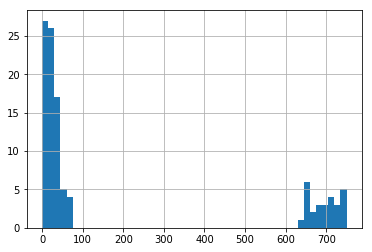

In [299]:
res5.loc[0:,'most_recent_spray (days)'][res5.loc[0:,'most_recent_spray (days)']<3650].hist(bins=50)

Seems like locations were either sprayed 2 years ago (around 700 days bars) or in this season (last 80 days).

This is the data that could be target link and we need to be cautious with.

In [331]:
recol=res5.loc[0:,'most_recent_spray (days)'][res5.loc[0:,'most_recent_spray (days)']<150]
recol.count()

79

there are 79 trap collections (entries) conducted recently after spraying (the same season <150 days). 

In [332]:
res5.loc[0:,'WnvPresent'][res5.loc[0:,'most_recent_spray (days)']<150].value_counts()

0    71
1     8
Name: WnvPresent, dtype: int64

####  surprisingly the frequency is higher 10%(8/79) in the recently sprayed data, than in the whole data combined ~5%.
This could have an alternative explanation: Places that are sprayed are proune to have WNV and therefore were a target for spraying in the first place.
This still shows that there is a target link. therefore these 79 cases should be taken care of in our modelling.

In [372]:
# let' add a column - whether the area was recently sprayed (i.e. <150 days)
res5['Recently_sprayed']=(res5['most_recent_spray (days)']<150).astype(int)
res5['Recently_sprayed'].value_counts()

0    10427
1       79
Name: Recently_sprayed, dtype: int64

#  # # # # 4

#### Let's do some EDA on the merged data in context of sprayed VS not sprayed

In [360]:
resin_copy=resIN.copy()

In [ ]:
plt.subplot(1,2,1)
plt.bar(['No','Yes'],[notspr[0],notspr[1]],color=['navy','orange'])
plt.title('Not Sprayed')
plt.subplot(1,2,2)
plt.bar(['Yes','No'],[spr[1],spr[0]],color=['orange','navy'])
plt.title('Sprayed')

In [ ]:
print("occurences of WNV in sprayed places:")
spr=resin_copy['WnvPresent'].value_counts()
print(spr)
print('percentage: ',spr[1]/(spr[0]+spr[1])*100)
notsprayed=resin_copy[resin_copy['Date_of_collection'].isnull()==1]
print("occurences of WNV in sprayed places:")
notspr=notsprayed['WnvPresent'].value_counts()
print(notspr)
print('percentage: ',notspr[1]/(notspr[0]+notspr[1])*100)
plt.subplot(1,2,1)
plt.bar(['No','Yes'],[notspr[0],notspr[1]],color=['navy','orange'])
plt.title('Not Sprayed')
plt.subplot(1,2,2)
plt.bar(['Yes','No'],[spr[1],spr[0]],color=['orange','navy'])
plt.title('Sprayed')

# # # # # 

## Weather data

### Background

From Kaggle:
    - It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. We provide you with the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests.

From '/Users/eran/Galvanize_more_repositories/WestNileVirus/all/noaa_weather_qclcd_documentation.pdf':
    - Dew point is an accurate measurement of humidity (indipendant of Relative humidity) 60= uncomfortable, 70 very uncomfortable.
        https://minnesota.cbslocal.com/2012/07/17/good-question-whats-the-difference-between-dew-point-and-humidity/
    
   - M = missing data
  - Departure from normal temperatures(?) for normal expected
    - "A lower wet bulb temperature means the air is drier and can hold more water vapor than it can at a higher wet bulb temperature."

### Rational
- Find columns directly related to Hot and Dry <-> higher WNV virus
- try to engineer them 
- merge according to proximity to weather station And Date

### EDA

In [363]:
weather_csv=os.path.join(directory_path,"weather.csv")
weather=pd.read_csv(weather_csv)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [406]:
weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4


In [433]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [365]:
weather['Station'].unique()
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

array([1, 2])

In [462]:
#dim=(16,5)
#plt.subplots(figsize=dim)
weather['Depart'][weather['Depart']!='M'].max(), weather['Depart'][weather['Depart']!='M'].min()

('23', ' 0')

In [463]:
weather['WetBulb'][weather['WetBulb']!='M'].max(), weather['WetBulb'][weather['WetBulb']!='M'].min()

('78', '32')

In [461]:
weather['Cool'][weather['Cool']!='M'].max(), weather['Cool'][weather['Cool']!='M'].min()

('29', ' 0')

In [561]:
print(type(weather.loc[122,'Sunrise'])) ## times are strings
sum(weather['Sunrise']=='-') ## alternating '-' 1472/2944

<class 'str'>


1472

In [520]:
weather[['Depart','WetBulb','Heat','Cool','Sunrise','CodeSum']].describe()

,Depart,WetBulb,Heat,Cool,Sunrise,CodeSum
count,2944,2944,2944,2944,2944,2944
unique,42,48,31,31,122,98
top,M,63,0,0,-,
freq,1472,135,1870,1147,1472,1609


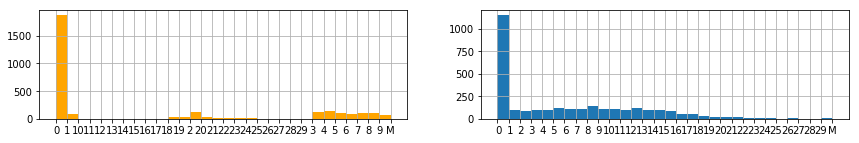

In [540]:
dimm=(14.5,2)
plt.subplots(figsize=dimm)
plt.subplot(1,2,1)
weather['Heat'].hist(bins=30,color='orange')
plt.subplot(1,2,2)
weather['Cool'].hist(bins=30)

#### summary of features - post some EDA 
( {-/+} means hypothetical correlation to WNV response) :
- Dew point - is an accurate measurement of humidity (indipendant of Relative humidity) 60= uncomfortable, 70 very uncomfortable. {-}  
- Depart - Departure from normal expected (in temperatures(?)) {?}
a lot of missing data (M)
- WetBulb - temps: the lower the dryer, "A lower wet bulb temperature means the air is drier {-}
- Heat and Cool - look like days in a month (mostly zero) {+/-} (maybe split)
- Sunrise - type 'str' alternating empty = '-' (half of data) 1472/2944{?} 
- Depth - of snow. all is Zero or M (NaN) (should drop)
- CodeSum -Codes. Type 'str'. almost all related to cold / wet / stormy weather (top 8 most prevalent). empty is ' ' 1609 out of 2944 {-/+} (maybe split) empty might be normal days that are {+}
- Water1 - All missing data (M) (should drop)


In [552]:
print(weather['CodeSum'].value_counts().index[4],' - Meanning: TS-THUNDERSTORM,RA-RAIN,BR-MIST')
print(weather['CodeSum'].value_counts().head(9))
print(type(weather['CodeSum'][2]))
weather['CodeSum'][weather['CodeSum']==' ']

TSRA RA BR  - Meanning: TS-THUNDERSTORM,RA-RAIN,BR-MIST
              1609
RA             296
RA BR          238
BR             110
TSRA RA BR      92
BR HZ           81
RA DZ BR        65
TSRA RA         43
HZ              39
Name: CodeSum, dtype: int64
<class 'str'>


2944

Codes. almost all related to cold / wet / stormy weather. so effecting WNV. 1609 empty

In [433]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [553]:
weather.Depth[900:906]

(900    0
 901    M
 902    0
 903    M
 904    0
 905    M
 Name: Depth, dtype: object, 'M')

In [562]:
print(weather.Water1.value_counts()),print(weather.SnowFall.value_counts()

(M    2944
 Name: Water1, dtype: int64, M      1472
 0.0    1459
   T      12
 0.1       1
 Name: SnowFall, dtype: int64)